In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import time  
from sklearn import metrics  
import pickle as pickle  

from sklearn.cross_validation import train_test_split  #引用交叉验证  

C:\Users\chenyuxiang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%matplotlib inline

In [5]:
data_file_path = "C:/Users/chenyuxiang/Desktop/Transparency_data_all.csv"
all_data_df = pd.read_csv(data_file_path, header=0)

In [7]:
feature_cols = ['T0101','T0102','T0201','T0202','T0203','T0204','T0205','T0206','T0207','T0208','T0209','T0210','T0211','T0212','T0213',
'T0301','T0302','T0303','T0304','T0305','T0306','T0307','T0308','T0309']

X = all_data_df[feature_cols]

In [10]:
#Find the average distortion when k = 1 to 9
from sklearn.cluster import KMeans
#Use scipy to calculate distance
from scipy.spatial.distance import cdist

K = range(1,10)
mean_distortions=[]
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    mean_distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), 
                                       axis = 1))/X.shape[0])


In [11]:
print(mean_distortions)

[0.6141445218700111, 0.5340343519940902, 0.4249992602547732, 0.343634417724586, 0.300255814568362, 0.21838595758297347, 0.19650728912270846, 0.17035147743292847, 0.16002102178268768]


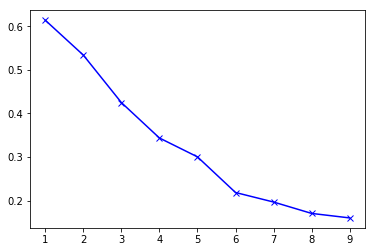

In [12]:
plt.plot(K, mean_distortions, 'bx-')
#     plt.xlabel('k')
#     plt.ylabel('mean distortions')

In [15]:
kmeans_model = KMeans(n_clusters = 3).fit(X)

In [16]:
kmeans_model.cluster_centers_

array([[ 9.97701977e-01,  1.84297236e-02,  9.97342069e-01,
         9.88141851e-01,  8.53353315e-01,  9.99884557e-01,
         1.00000000e+00,  9.66493183e-01,  1.00000000e+00,
         9.98576328e-01,  9.32657746e-01,  1.00000000e+00,
         9.99986576e-01,  9.90708778e-01,  9.80801102e-01,
         6.04131795e-01,  9.20036387e-01,  9.75743027e-01,
         0.00000000e+00,  5.36945462e-03,  1.66071036e-02,
         3.51079725e-05,  3.76584634e-03,  9.99373736e-01],
       [ 1.01498672e-03,  2.56628740e-03,  1.07469183e-03,
         2.02997343e-03,  6.76657846e-04, -4.63296068e-13,
         1.32173826e-01,  9.80702722e-01,  1.00000000e+00,
         9.99498772e-01,  9.79650143e-01,  1.00000000e+00,
         1.00000000e+00,  9.91629492e-01,  1.00000000e+00,
         5.00000000e-01,  9.23076960e-01,  9.99999980e-01,
         0.00000000e+00,  1.57886823e-03, -1.94462502e-15,
         2.08370105e-17, -1.49316323e-15,  9.99317077e-01],
       [ 9.96079487e-01,  6.72982399e-03,  9.96357272e

In [31]:
categories_df = pd.DataFrame({'Transparency_Category': kmeans_model.labels_})
categories_df.index = all_data_df.index

In [34]:
all_data_with_category_df = pd.merge(categories_df, all_data_df, left_index = True, right_index = True)

In [35]:
all_data_with_category_df

,Transparency_Category,PRIPID,ANCHEYEAR,TRANSPARENCY,SCORE,T0101,T0102,T0201,T0202,T0203,...,T0213,T0301,T0302,T0303,T0304,T0305,T0306,T0307,T0308,T0309
0,0,511922000012014110300542,2016,B,0.783566,1.0,0.0,1.000000,0.916667,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
1,0,511921000012014123000084,2016,B,0.785490,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
2,0,511900000012014060600571,2016,B,0.783566,1.0,0.0,1.000000,0.916667,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,2,511923000012016070500091,2016,B,0.747028,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
4,0,511900000012014072200100,2016,B,0.783566,1.0,0.0,1.000000,0.916667,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
5,0,511923000012016030901125,2016,B,0.783566,1.0,0.0,1.000000,0.916667,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
6,2,511922000012014121100536,2016,B,0.766259,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
7,0,511902000012015042700664,2016,B,0.785490,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
8,0,511722000012016032201466,2016,B,0.785490,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
9,2,511902000012016091200002,2016,B,0.766259,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
category_0_df = all_data_with_category_df[all_data_with_category_df['Transparency_Category'] == 0]

In [38]:
category_1_df = all_data_with_category_df[all_data_with_category_df['Transparency_Category'] == 1]

In [39]:
category_2_df = all_data_with_category_df[all_data_with_category_df['Transparency_Category'] == 2]

In [40]:
#Saperate all data into three clustering categories and output to csv file
all_data_with_category_df.to_csv('C:/Users/chenyuxiang/Desktop/KMeans_Clustering_Transparency.csv')

In [41]:
# Try to saperate data into 9 categories

kmeans_model_k9 = KMeans(n_clusters = 9).fit(X)

In [42]:
categories_9_df = pd.DataFrame({'Transparency_Category': kmeans_model_k9.labels_})
categories_9_df.index = all_data_df.index

In [44]:
all_data_with_category_9_df = pd.merge(categories_9_df, all_data_df, left_index = True, right_index = True)

In [45]:
all_data_with_category_9_df

,Transparency_Category,PRIPID,ANCHEYEAR,TRANSPARENCY,SCORE,T0101,T0102,T0201,T0202,T0203,...,T0213,T0301,T0302,T0303,T0304,T0305,T0306,T0307,T0308,T0309
0,0,511922000012014110300542,2016,B,0.783566,1.0,0.0,1.000000,0.916667,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
1,0,511921000012014123000084,2016,B,0.785490,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
2,0,511900000012014060600571,2016,B,0.783566,1.0,0.0,1.000000,0.916667,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,5,511923000012016070500091,2016,B,0.747028,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
4,0,511900000012014072200100,2016,B,0.783566,1.0,0.0,1.000000,0.916667,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
5,0,511923000012016030901125,2016,B,0.783566,1.0,0.0,1.000000,0.916667,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
6,2,511922000012014121100536,2016,B,0.766259,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
7,0,511902000012015042700664,2016,B,0.785490,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
8,0,511722000012016032201466,2016,B,0.785490,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
9,2,511902000012016091200002,2016,B,0.766259,1.0,0.0,1.000000,1.000000,1.000000,...,1.0,0.5,0.923077,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
all_data_with_category_9_df.to_csv('C:/Users/chenyuxiang/Desktop/KMeans_k9_Clustering_Transparency.csv')